In [1]:
# 필요한 라이브러릴 가져오기
import cv2 # 동영상이나 이미지를 다룰 때 사용하는 라이브러리입니다
import matplotlib.pyplot as plt # 이미지를 화면에 보여줄 때 사용하는 라이브러리입니다

In [11]:
# YOLO 모델을 사용하기 위한 라이브러리를 불러옵니다
# ultralytics 라이브러리는 YOLO를 쉽게 사용할 수 있도록 도와줍니다
from ultralytics import YOLO

In [12]:
# 사용할 동영상 파일 경로 지정하기
video_path = 'incredibles.mp4' # incredible.mp4 동영상 파일을 사용합니다

In [13]:
# 동영상 파일을 열기 (불러오기)
cap = cv2.VideoCapture(video_path)
# cv2.VideoCapture는 동영상 파일을 불러와서 프레임(동영상의 이미지 하나하나)을 읽을 수 있도록 해주는 함수입니다
# 매개변수: video_path - 동영상 파일의 위치와 이름을 임력합니다

In [14]:
# 프레임 출력 간격 설정하기
frame_interval = 10
# frame_interval을 10으로 설정하면, 동영상에서 매 10번째 프레임을 선택해서 화면에 출력합니다
# 예를 들어 0, 10, 20번째 프레임과 같이 10개마다 프레임을 가져옵니다

# 현재 몇 번째 프레임인지 세는 변수 만들기
count = 0 # 현재 프레임 번호를 저장하는 변수입니다 처음에는 0부터 시작합니다

# 화면에 출력된 프레임 개수를 세는 변수 만들기
displayed_frames = 0 # 총 몇 개의 프레임을 화면에 출력했는지 저장하는 변수입니다

In [15]:
# 미리 학습된 YOLO 모델 파일을 불러와서 준비합니다
model = YOLO('incredible_yolo_model.pt')
# YOLO() 함수는 YOLO 탐지 모델을 만들어줍니다
#매개변수 설명:
#  - 'incredible_yolo_model.pt': 미리 학습되어 저장된 YOLO 모델 파일입니다
#     이 모델은 '인크레더블' 영상의 등장인물을 찾아낼 수 있도록 학습된 파일입니다


0: 288x640 1 mr_incredible, 1 elastic_girl, 61.9ms
Speed: 3.4ms preprocess, 61.9ms inference, 2.3ms postprocess per image at shape (1, 3, 288, 640)

0: 288x640 1 dash, 10.6ms
Speed: 1.8ms preprocess, 10.6ms inference, 2.4ms postprocess per image at shape (1, 3, 288, 640)

0: 288x640 1 violet, 10.3ms
Speed: 1.5ms preprocess, 10.3ms inference, 2.1ms postprocess per image at shape (1, 3, 288, 640)

0: 288x640 1 mr_incredible, 1 elastic_girl, 11.4ms
Speed: 1.7ms preprocess, 11.4ms inference, 2.1ms postprocess per image at shape (1, 3, 288, 640)

0: 288x640 (no detections), 9.3ms
Speed: 1.7ms preprocess, 9.3ms inference, 0.9ms postprocess per image at shape (1, 3, 288, 640)

0: 288x640 (no detections), 9.5ms
Speed: 1.5ms preprocess, 9.5ms inference, 0.9ms postprocess per image at shape (1, 3, 288, 640)

0: 288x640 1 dash, 9.5ms
Speed: 1.6ms preprocess, 9.5ms inference, 2.0ms postprocess per image at shape (1, 3, 288, 640)

0: 288x640 1 dash, 9.7ms
Speed: 1.8ms preprocess, 9.7ms inference, 

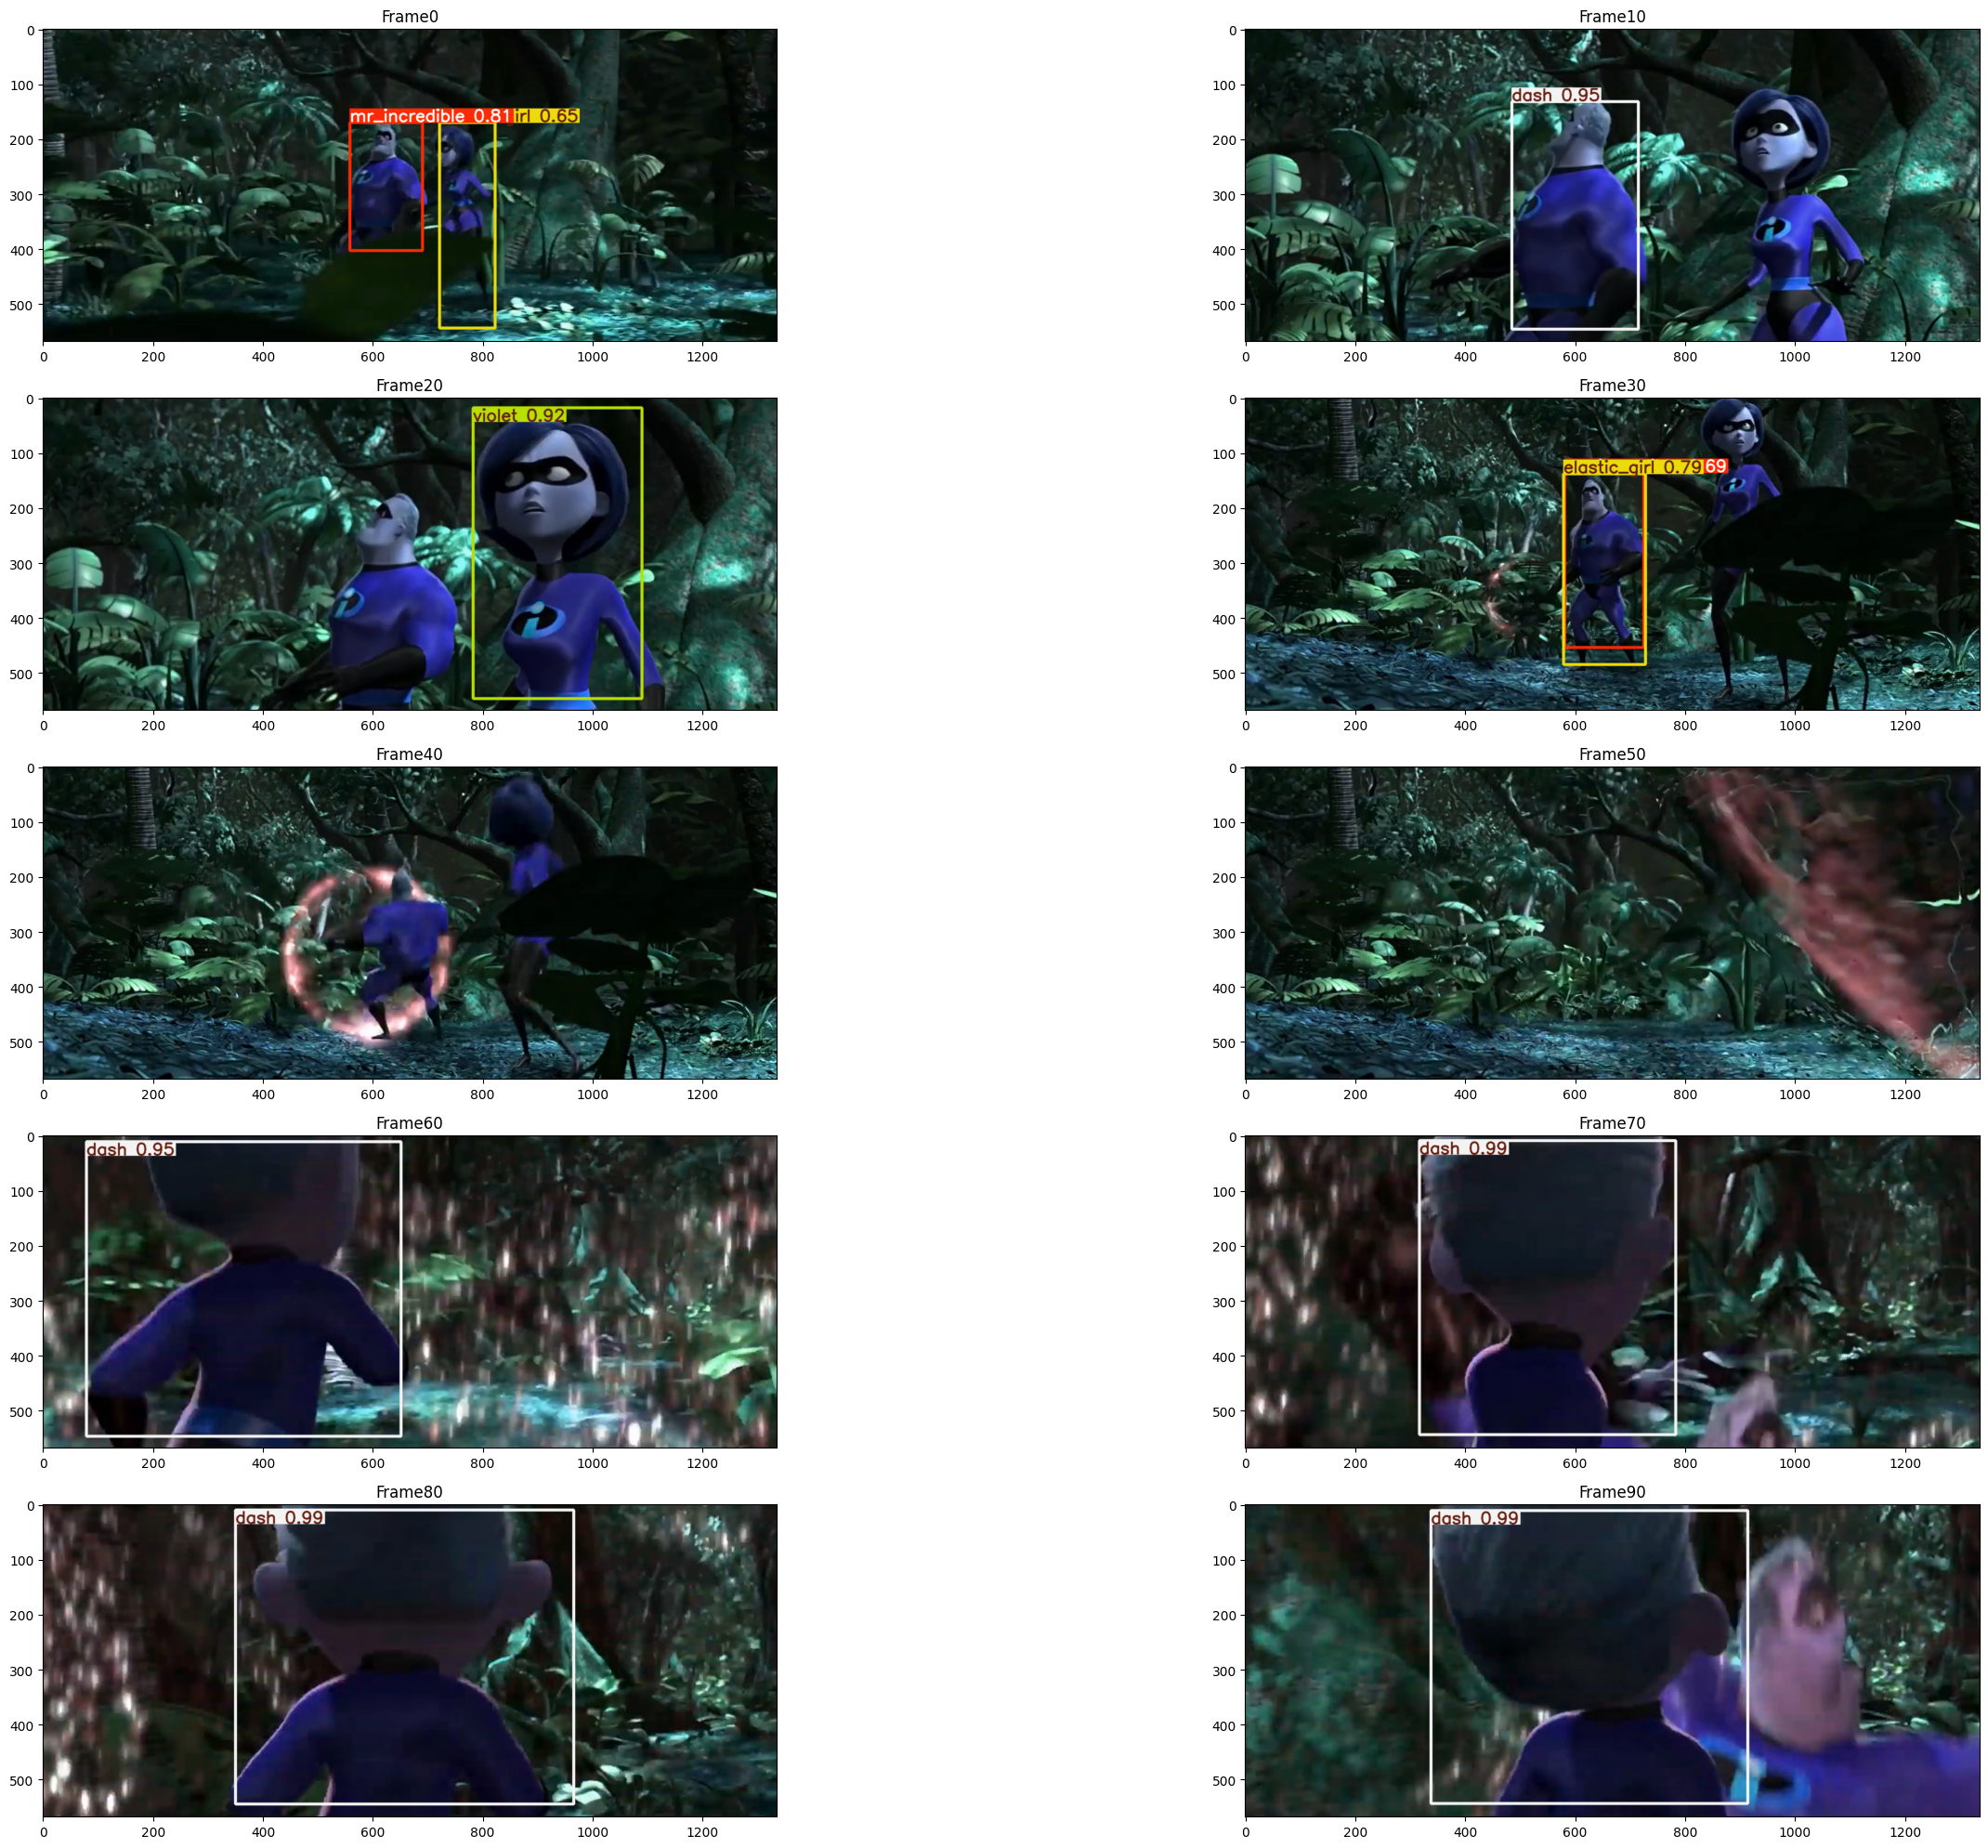

In [16]:
# 그림을 출력할 화면의 크기 지정하기
plt.figure(figsize=(30, 20))
# plt.figure는 그림을 화면을 만듭니다
# 매개변수: figsize=(가로크기, 세로크기) - 그림을 보여줄 창의 크기를 지정합니다

#동영상에서 프레임을 하나씩 읽어서 화면에 출력하기
while cap.isOpened() and displayed_frames < 10:
    # cap.isOpened()는 동영상이 정상적으로 열렸는지 확인합니다
    # displayed_frames < 10 조건은 화면에 10개의 프레임을 출력하면 작업을 멈춥니다

    # 동영상에서 프레임 하나 읽기
    ret, frame = cap.read()
    # cap.read()는 동영상에서 한 프레임씩 읽어서 ret과 frame 두 값을 돌려줍니다
    # ret: 프레임을 잘 읽었으면 True(참), 더 이상 읽을 게 없으면 False(거짓)를 반환합니다
    # frame: 읽어온 프레임(이미지)을 저장하는 변수입니다

    # 더 이상 읽을 프레임이 없으면 반복을 멈추기
    if not ret:
        break
        # ret이 False이면 프레임을 읽는 것을 멈추고 반복문을 빠져나갑니다
 
    # 매 10번째 프레임만 선택해서 출력하기
    if count % frame_interval == 0:
        #화면에 이미지를 5줄 2칸으로 나누고, 각 칸에 프레임 이미지 출력하기
        plt.subplot(5, 2, displayed_frames + 1)
        # plt.subplot(행의 수, 열의 수, 위치)는 여러 이미지를 한 화면에 나누어서 보여줄 때 사용하는 함수입니다
        # 매개변수:
        #     5: 5줄로 나눕니다
        #     2: 2칸으로 나눕니다
        # displayed_frames + 1: 그림을 출력할 칸의 위치입니다(1부터 시작합니다)

        # YOLO 모델로 이미지(frame)에서 등장인물을 탐지합니다
        results = model(frame, conf=0.5)
        # model() 함수는 이미지를 입력받아 객체(여기서는 등장인물)를 탐지합니다
        # 매개변수 설명:
        #   - frame: 탐지할 대상 이미지(영상의 한 장면 프레임)입니다
        #   - conf=0.5: 탐지 결과에 대한 신뢰도(confidence)입니다
        #               0.5는 탐지된 객체가 실제로 존재할 확률이 최소 50% 이상인 경우만 표시합니다
        # results: 탐지 결과를 저장하는 변수입니다

        # 탐지된 결과를 이미지 위에 표시하여 새로운 이미지를 만듭니다
        annotated_frame = results[0].plot()
        # results[0]는 탐지 결과 중 첫 번째 결과를 의미합니다(여기서는 이미지가 한 장이므로 결과는 하나입니다)
        # plot() 함수는 탐지된 결과(박스, 이름 등)를 원본 이미지 위에 표시해서 새로운 이미지를 만들어줍니다
        # annotated_frame 변수에 박스와 이름이 표시된 이미지가 저장됩니다

        # 이미지를 화면에 출력하기
        plt.imshow(annotated_frame)
        # plt.imshow()는 이미지를 화면에 보여주는 함수입니다
        # 매개변수:
        #  annotated_frame - 출력할 프레임 이미지입니다

        # 이미지 제목 붙이기 (현재 프레임 번호 출력)
        plt.title(f'Frame{count}')
        # plt.title은 이미지 위에 제목을 표시해줍니다
        # f'Frame {count}'는 몇 번째 프레임인지 번호를 제목을 표시합니다

        # 화면에 출력된 프레임 수 하나 증가시키기
        displayed_frames += 1

    # 다음 프레임으로 넘어가기 위해 프레임 번호 하나 증가시키기
    count += 1

# 동영상 파일을 닫기 (메모리에서 해제)
cap.release()
# cap.release()는 불러온 동영상 파일을 닫아줍니다

# 화면의 이미지가 겹치지 않고 잘 보이게 정리해서 보여주기
plt.tight_layout()
# plt.tight_layout()은 이미지 간격과 레이아웃을 보기 좋게 정리합니다

#이미지를 화면에 출력하기
plt.show()
# plt.show()는 지금까지 설정한 내용을 화면에 보여줍니다